# Matrix element of $\Lambda_c$ decay: Dynamical input

In [1]:
const m1 = 0.938;   const m1sq = m1^2;
const m2 = 0.13957; const m2sq = m2^2;
const m3 = 0.49367; const m3sq = m3^2;
const m0 = 2.2845;  const m0sq = m0^2;

In [2]:
using Plots

In [3]:
λ(x,y,z) = x^2+y^2+z^2-2x*y-2y*z-2z*x
# sigma1(y) as a function of sigma2
# sigma1 = (p0-p1)^2
σ1b(σ2) = m1sq+m0sq-(m0sq+σ2-m2sq)*(σ2+m1sq-m3sq)/(2σ2) .+ sqrt(λ(m0sq,σ2,m2sq)*λ(σ2,m1sq,m3sq))/(2σ2) .* [-1,1]
Kibble(σ1,σ2) = (2σ2*(m1sq+m0sq-σ1)-(m0sq+σ2-m2sq)*(σ2+m1sq-m3sq))^2 - λ(m0sq,σ2,m2sq)*λ(σ2,m1sq,m3sq)
inBorder(σ1,σ2) = Kibble(σ1,σ2) < 0.0 ? 1.0 : NaN

inBorder (generic function with 1 method)

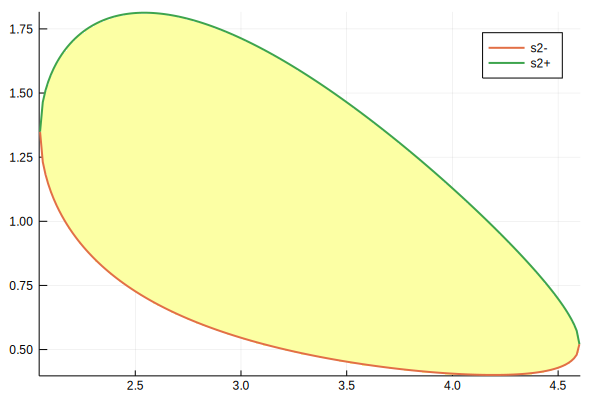

In [4]:
let σ2v = linspace((m3+m1)^2, (m0-m2)^2, 300), σ1v = linspace((m2+m3)^2, (m0-m1)^2, 200),
    cal = [inBorder(σ1,σ2) for σ1 in σ1v, σ2 in σ2v]
    heatmap(σ2v, σ1v, cal, lab="", colorbar=false)
end
let σ2v = linspace((m3+m1)^2, (m0-m2)^2, 200)
    σ1v = hcat(σ1b.(σ2v)...)'
    plot!(σ2v, σ1v, lab=["s2-" "s2+"], lw=2)
end

### Dynamics of the reaction

In [5]:
const mKs = 0.89176; const ΓKs = 0.05;
const mΛ  = 1.5195;  const ΓΛ  = 0.0156;
const mΔ  = 1.232;   const ΓΔ = 0.112;

In [6]:
BW(σ,msq,Γ) = 1.0 / (msq-σ-1im*√msq*Γ)
######
Ks(σ) = BW(σ,mKs^2,ΓKs)
Λ(σ) = BW(σ,mΛ^2,ΓΛ)
Δ(σ) = BW(σ,mΔ^2,ΓΔ)

Csl = [
    # channel #1 pi K
    [(Ks, 1.0)],
    # channel #2 K p
    [(Λ, 1.0)],
    # channel #3 p pi
    [(Δ, 3.0)]
]

3-element Array{Array{Tuple{Function,Float64},1},1}:
 Tuple{Function,Float64}[(Ks, 1.0)]
 Tuple{Function,Float64}[(Λ, 1.0)] 
 Tuple{Function,Float64}[(Δ, 3.0)] 

### Plot contributions

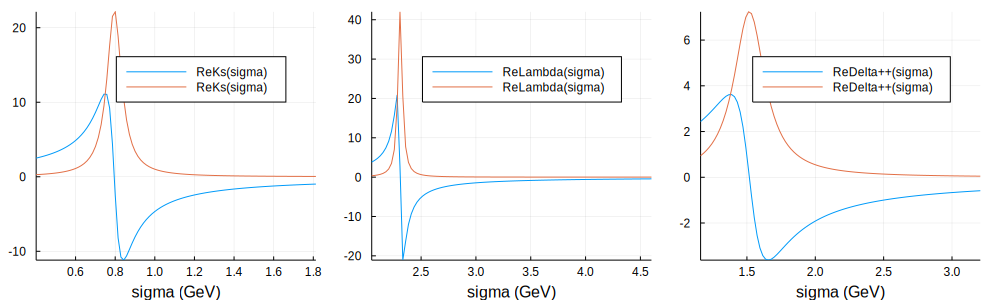

In [7]:
let
    plot(layout=grid(1,3),size=(1000,300))
    ms = [m1,m2,m3]
    fs = [(Ks,"Ks"),(Λ,"Lambda"),(Δ,"Delta++")]
    for k=1:3
        i,j = mod(k,3)+1, mod(k+1,3)+1
#         @show i,j
        σv = linspace((ms[i]+ms[j])^2, (m0-ms[k])^2,100)
        cal = fs[k][1].(σv)
        plot!(σv, [real.(cal) imag.(cal)], subplot=k,
            lab="Re"*fs[k][2]*"(sigma)", xlab="sigma (GeV)", leg=:topright)
    end
    plot!()
end

### Matrix element and Intensity

In [8]:
function M(σ1,σ2, Csl)
    σs = [σ1, σ2, m0sq+m1sq+m2sq+m3sq-σ1-σ2]
    sum(sum(R(σs[k])*c for (R,c) in Csl[k]) for k = 1:3)
end
intens(pars...) = abs2(M(pars...))

intens (generic function with 1 method)

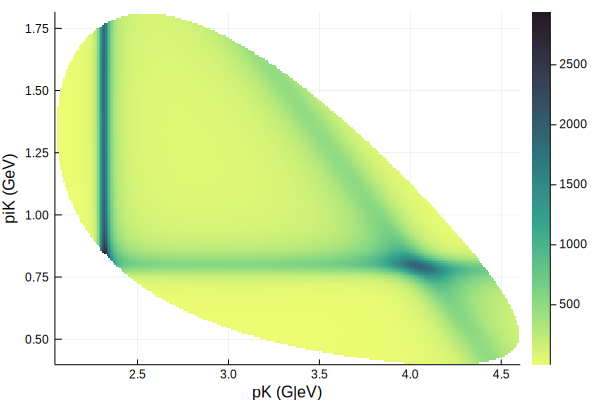

In [9]:
function plot_dalitz(Csl)
    σ2v = linspace((m3+m1)^2, (m0-m2)^2, 300)
    σ1v = linspace((m2+m3)^2, (m0-m1)^2, 200)
    cal = [intens(σ1,σ2,Csl)*inBorder(σ1,σ2) for σ1 in σ1v, σ2 in σ2v]
    heatmap(σ2v, σ1v, cal, c=:lime_grad, xlab="pK (G|eV)", ylab="piK (GeV)")
end
plot_dalitz(Csl)

### Projected Dalitz Plot

In [10]:
using QuadGK

In [11]:
# integration ranges
σ1b(σ2) = m1sq+m0sq-(m0sq+σ2-m2sq)*(σ2+m1sq-m3sq)/(2σ2) .+ sqrt(λ(m0sq,σ2,m2sq)*λ(σ2,m1sq,m3sq))/(2σ2) .* [-1,1]
σ2b(σ3) = m2sq+m0sq-(m0sq+σ3-m3sq)*(σ3+m2sq-m1sq)/(2σ3) .+ sqrt(λ(m0sq,σ3,m3sq)*λ(σ3,m2sq,m1sq))/(2σ3) .* [-1,1]
σ3b(σ1) = m3sq+m0sq-(m0sq+σ1-m1sq)*(σ1+m3sq-m2sq)/(2σ1) .+ sqrt(λ(m0sq,σ1,m1sq)*λ(σ1,m3sq,m2sq))/(2σ1) .* [-1,1]
# integrals
projection1(σ1,Csl) = quadgk(σ3->intens(σ1,m0sq+m1sq+m2sq+m3sq-σ3-σ1,Csl),σ3b(σ1)...)[1]
projection2(σ2,Csl) = quadgk(σ1->intens(σ1,σ2,Csl),σ1b(σ2)...)[1]
projection3(σ3,Csl) = quadgk(σ2->intens(m0sq+m1sq+m2sq+m3sq-σ2-σ3,σ2,Csl),σ2b(σ3)...)[1]

projection3 (generic function with 1 method)

Check it integrals are the same

In [12]:
[quadgk(σ1->projection1(σ1,Csl),(m2+m3)^2,(m0-m1)^2)[1],
 quadgk(σ2->projection2(σ2,Csl),(m3+m1)^2,(m0-m2)^2)[1],
 quadgk(σ3->projection3(σ3,Csl),(m1+m2)^2,(m0-m3)^2)[1]]

3-element Array{Float64,1}:
 548.322
 548.322
 548.322

I define a special plot function which makes Dalitz Plot 

In [13]:
@userplot DalitzPlot
@recipe function f(h::DalitzPlot)
    if length(h.args) != 1|| !(typeof(h.args[1])<:(Vector{Vector{Tuple{Function,T}}} where {T}))
        error("DalitzPlot needs k-index and Settings.  Got: $(typeof(h.args))")
    end
    Csl = h.args[1]
    σ2v = linspace((m3+m1)^2, (m0-m2)^2, 300)
    σ1v = linspace((m2+m3)^2, (m0-m1)^2, 200)
    cal = [intens(σ1,σ2,Csl)*inBorder(σ1,σ2) for σ1 in σ1v, σ2 in σ2v]
    x, y, z = σ2v, σ1v, cal    
    @series begin
        seriestype := :heatmap
        color := :lime_grad
        x, y, z
    end
end

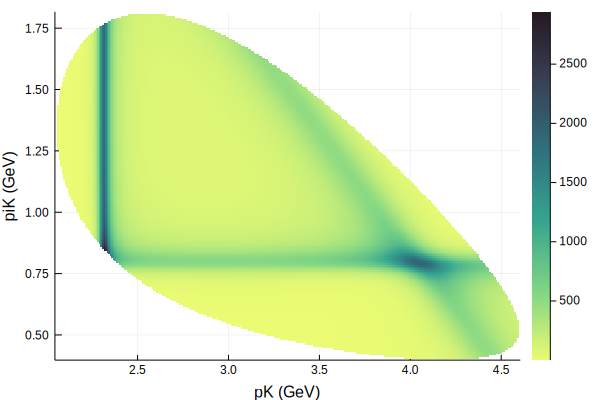

In [14]:
dalitzplot(Csl, xlab="pK (GeV)", ylab="piK (GeV)")

I define a special plot function which makes Dalitz Plot projection

In [15]:
@userplot DalitzProjection
@recipe function f(h::DalitzProjection)
    if length(h.args) != 2 || !(typeof(h.args[1])==Int) || !(typeof(h.args[2])<:(Vector{Vector{Tuple{Function,T}}} where {T}))
        error("DalitzProjection needs k-index and Settings.  Got: $(typeof(h.args))")
    end
    k, Csl = h.args
    # calculation
    const ms = [m1, m2, m3]
    const projections = [projection1, projection2, projection3];
    i,j = mod(k,3)+1, mod(k+1,3)+1
    x = linspace((ms[i]+ms[j])^2, (m0-ms[k])^2, 200)
    y = [projections[k](σ,Csl) for σ in x]
    @series begin
        x, y
    end
end

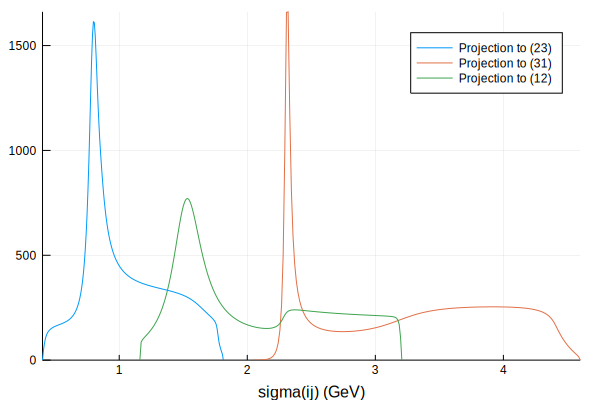

In [16]:
dalitzprojection( 1,Csl, lab="Projection to (23)", xlab="sigma(ij) (GeV)")
dalitzprojection!(2,Csl, lab="Projection to (31)")
dalitzprojection!(3,Csl, lab="Projection to (12)")

## Interactive part
change parameters by moving sliders

In [17]:
using Interact

### Adjust strength

Interact.Options{:SelectionSlider,Float64}(1: "input" = 3.5 Float64 , "str", 3.5, "3.5", 14, Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.5"=>-2.5,"-2.0"=>-2.0,"-1.5"=>-1.5,"-1.0"=>-1.0,"-0.5"=>-0.5,"0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0,"1.5"=>1.5…), Dict(5.5=>"5.5",6.5=>"6.5",2.0=>"2.0",-1.0=>"-1.0",1.5=>"1.5",4.5=>"4.5",0.0=>"0.0",7.0=>"7.0",8.5=>"8.5",9.0=>"9.0"…)), Any[], Any[], true, "horizontal", true)

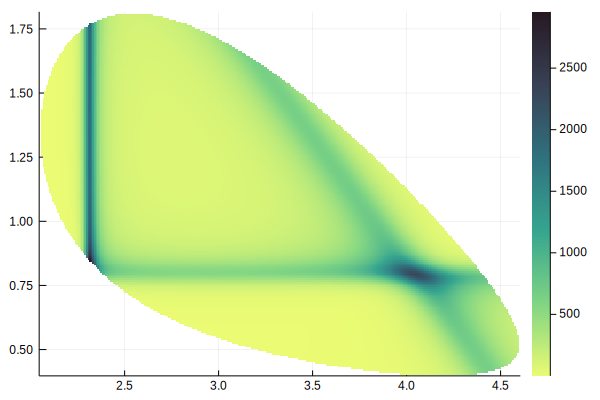

In [18]:
@manipulate for str=-3:0.5:10
    Csl = [
        [(Ks, 1.0)],
        [(Λ, 1.0)],
        [(Δ, str)]]
    dalitzplot(Csl)
end

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 2.0 Float64 , "str", 2.0, "2.0", 7, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.5"=>-0.5,"0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0,"1.5"=>1.5,"2.0"=>2.0,"2.5"=>2.5,"3.0"=>3.0,"3.5"=>3.5…), Dict(2.0=>"2.0",-1.0=>"-1.0",1.5=>"1.5",4.5=>"4.5",0.0=>"0.0",3.5=>"3.5",-0.5=>"-0.5",4.0=>"4.0",0.5=>"0.5",3.0=>"3.0"…)), Any[], Any[], true, "horizontal", true)

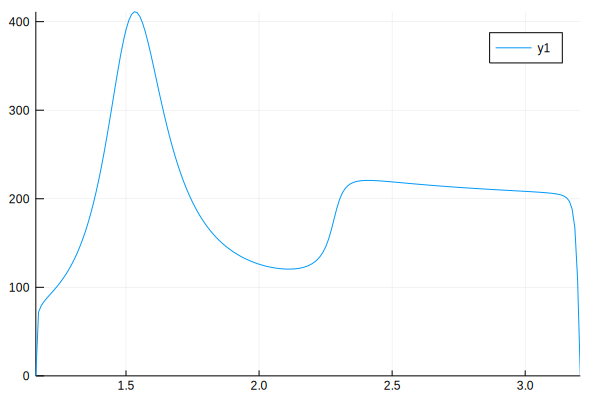

In [19]:
@manipulate for str=-1:0.5:5
    Csl = [
        [(Ks, 1.0)],
        [(Λ, 1.0)],
        [(Δ, str)]]
    dalitzprojection(3,Csl)
end

### Adjust masses of isobars

Interact.Options{:SelectionSlider,Float64}(9: "input-3" = 0.8521262222222222 Float64 , "_mKs", 0.8521262222222222, "0.8521262222222222", 5, Interact.OptionDict(DataStructures.OrderedDict("0.535056"=>0.535056,"0.6143235555555555"=>0.614324,"0.6935911111111112"=>0.693591,"0.7728586666666667"=>0.772859,"0.8521262222222222"=>0.852126,"0.9313937777777778"=>0.931394,"1.0106613333333334"=>1.01066,"1.089928888888889"=>1.08993,"1.1691964444444445"=>1.1692,"1.248464"=>1.24846…), Dict(0.693591=>"0.6935911111111112",1.1692=>"1.1691964444444445",0.614324=>"0.6143235555555555",0.852126=>"0.8521262222222222",0.535056=>"0.535056",0.772859=>"0.7728586666666667",1.08993=>"1.089928888888889",1.01066=>"1.0106613333333334",0.931394=>"0.9313937777777778",1.24846=>"1.248464"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(11: "input-4" = 1.502616666666667 Float64 , "_mΛ", 1.502616666666667, "1.502616666666667", 5, Interact.OptionDict(DataStructures.OrderedDict("1.36755"=>1.36755,"1.4013166666666668"=>1.40132,"1.4350833333333335"=>1.43508,"1.4688500000000002"=>1.46885,"1.502616666666667"=>1.50262,"1.5363833333333334"=>1.53638,"1.5701500000000002"=>1.57015,"1.6039166666666669"=>1.60392,"1.6376833333333336"=>1.63768,"1.6714500000000003"=>1.67145…), Dict(1.53638=>"1.5363833333333334",1.57015=>"1.5701500000000002",1.36755=>"1.36755",1.67145=>"1.6714500000000003",1.60392=>"1.6039166666666669",1.63768=>"1.6376833333333336",1.50262=>"1.502616666666667",1.43508=>"1.4350833333333335",1.40132=>"1.4013166666666668",1.46885=>"1.4688500000000002"…)), Any[], Any[], true, "horizontal", true)

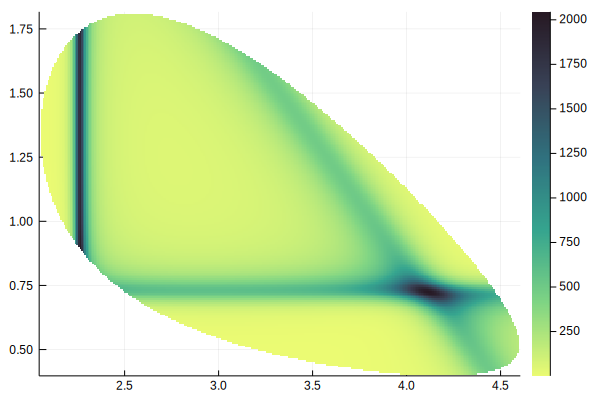

In [20]:
@manipulate for _mKs=linspace(0.6mKs,1.4mKs,10), _mΛ=linspace(0.9mΛ,1.1mΛ,10)
    Csl = [
        [(σ->BW(σ,_mKs^2,ΓKs), 1.0)],
        [(σ->BW(σ,_mΛ^2,ΓΛ), 1.0)],
        [(Δ, 3)]]
    dalitzplot(Csl)
end

Interact.Options{:SelectionSlider,Float64}(15: "input-5" = 0.8521262222222222 Float64 , "_mKs", 0.8521262222222222, "0.8521262222222222", 5, Interact.OptionDict(DataStructures.OrderedDict("0.535056"=>0.535056,"0.6143235555555555"=>0.614324,"0.6935911111111112"=>0.693591,"0.7728586666666667"=>0.772859,"0.8521262222222222"=>0.852126,"0.9313937777777778"=>0.931394,"1.0106613333333334"=>1.01066,"1.089928888888889"=>1.08993,"1.1691964444444445"=>1.1692,"1.248464"=>1.24846…), Dict(0.693591=>"0.6935911111111112",1.1692=>"1.1691964444444445",0.614324=>"0.6143235555555555",0.852126=>"0.8521262222222222",0.535056=>"0.535056",0.772859=>"0.7728586666666667",1.08993=>"1.089928888888889",1.01066=>"1.0106613333333334",0.931394=>"0.9313937777777778",1.24846=>"1.248464"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(17: "input-6" = 1.502616666666667 Float64 , "_mΛ", 1.502616666666667, "1.502616666666667", 5, Interact.OptionDict(DataStructures.OrderedDict("1.36755"=>1.36755,"1.4013166666666668"=>1.40132,"1.4350833333333335"=>1.43508,"1.4688500000000002"=>1.46885,"1.502616666666667"=>1.50262,"1.5363833333333334"=>1.53638,"1.5701500000000002"=>1.57015,"1.6039166666666669"=>1.60392,"1.6376833333333336"=>1.63768,"1.6714500000000003"=>1.67145…), Dict(1.53638=>"1.5363833333333334",1.57015=>"1.5701500000000002",1.36755=>"1.36755",1.67145=>"1.6714500000000003",1.60392=>"1.6039166666666669",1.63768=>"1.6376833333333336",1.50262=>"1.502616666666667",1.43508=>"1.4350833333333335",1.40132=>"1.4013166666666668",1.46885=>"1.4688500000000002"…)), Any[], Any[], true, "horizontal", true)

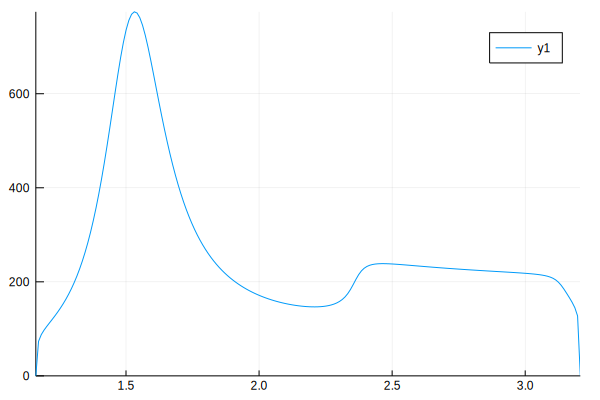

In [21]:
@manipulate for _mKs=linspace(0.6mKs,1.4mKs,10), _mΛ=linspace(0.9mΛ,1.1mΛ,10)
    Csl = [
        [(σ->BW(σ,_mKs^2,ΓKs), 1.0)],
        [(σ->BW(σ,_mΛ^2,ΓΛ), 1.0)],
        [(Δ, 3.0)]]
    dalitzprojection(3,Csl)
end